<a href="https://colab.research.google.com/github/aanzaya/Financial-Inclusion/blob/master/Financial_Inclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Seaborn
import seaborn as sns

In [0]:
import pandas_profiling

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

Reading the Dataset

In [0]:
# Loading the Data from the source 
# ---
# Dataset: http://bit.ly/FinancialDataset
# ---
proj = pd.read_csv("http://bit.ly/FinancialDataset")
proj.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
## Determining the count of records in our dataset
proj.shape


(23524, 13)

In [0]:
# Checking the validity of our dataset
proj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [0]:
# Checking the validity of each column
proj.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [0]:
# Pandas profiling 
import pandas_profiling
pandas_profiling.ProfileReport(proj)

Number of variables,13
Number of observations,23524
Total Missing (%),0.1%
Total size in memory,2.3 MiB
Average record size in memory,104.0 B
Numeric,3
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [0]:
#confirming the columns availability and check
proj.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [0]:
# Looking for the unique figures in columns. We can also confirm value and objects in columns. 
#For Country
proj.country.unique()

array(['Kenya', 'Rwanda', 'Tanzania', nan, 'Uganda'], dtype=object)

In [0]:
##
#For year
proj.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [0]:
#For uniqueid
proj['uniqueid'].unique()

array(['uniqueid_1', 'uniqueid_2', 'uniqueid_3', ..., 'uniqueid_8757',
       'uniqueid_8758', 'uniqueid_8759'], dtype=object)

In [0]:
## For Bank Account
proj['Has a Bank account'].unique()

array(['Yes', 'No', nan], dtype=object)

In [0]:
## For Location
proj['Type of Location'].unique()

array(['Rural', 'Urban', nan], dtype=object)

In [0]:
##For Phone access
proj['Cell Phone Access'].unique()

array(['Yes', 'No', nan], dtype=object)

In [0]:
##Fpr Household size
proj['household_size'].unique()

array([ 3.,  5.,  8.,  7.,  1.,  6.,  4., 10.,  2., 11.,  9., 12., 16.,
       15., 13., 14., 21., nan,  0., 18., 17., 20.])

In [0]:

##For Age
proj['Respondent Age'].unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        nan,  93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,
        94.,  87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

In [0]:
##FOr Gender
proj['gender_of_respondent'].unique()

array(['Female', 'Male', nan], dtype=object)

In [0]:
##For Rshp
proj['The relathip with head'].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives', nan], dtype=object)

In [0]:
##For Marital status
proj['marital_status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know', nan], dtype=object)

In [0]:

##For Level of educatation
proj['Level of Educuation'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6', nan],
      dtype=object)

In [0]:
##'Type of Job'
proj['Type of Job'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', nan, 'No Income'], dtype=object)

Data Cleaning

In [0]:
## Mean for age
proj['Respondent Age'].mean()

38.804299702000854

In [0]:
:
##
##Mode for age
proj['Respondent Age'].mode()

SyntaxError: ignored

In [0]:

###Mode for year
proj['year'].mode()

In [0]:
##
##
proj.describe()

In [0]:
##
## Checking missing values
proj.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [0]:
# ##
# Sorting null values by dropping null values
proj = proj.dropna()

In [0]:
:
## Checking if there is null values after dropping null values
proj.isnull().sum()

SyntaxError: ignored

In [0]:

proj.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


Exploratory Analysis on the data

In [0]:

##
## Renaming, replacing and writing columns in lower case
proj.columns = proj.columns.str.lower().str.replace(' ', '_')
proj.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [0]:

##
## Renaming, replacing and writing columns in lower case
proj.columns = proj.columns.str.lower().str.replace(' ', '_')
proj.columns

In [0]:

proj.columns

In [0]:
 ##
# ## replacing categorical variables with the mode
# cols = ['country', 'has_a_bank_account', 'type_of_location', 'cell_phone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'level_of_education', 'type_of_job']
# proj[cols] = proj[cols].fillna(proj.mode().iloc[0])

In [0]:
 ##
# ## Replacing missing values of numerical variables with there means
# meme = ['household_size', 'respondent_age', 'year']
# proj[meme] = proj[meme].fillna(proj.mean().iloc[0])

In [0]:
##
## drop the uniqueid
# proj.drop('uniqueid', axis = 1, inplace = True)

In [0]:

proj.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

Checking for Outliers

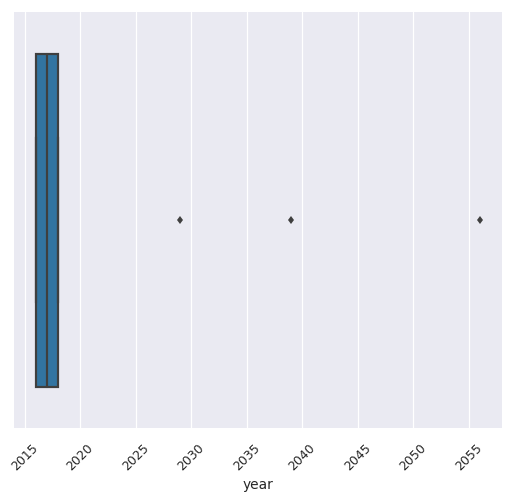

In [0]:
# Checking for outliers
plt.figure(dpi = 90, figsize = (7, 6))
sns.set_style('darkgrid')
sns.boxplot(proj.year)
plt.xticks(rotation = 45)
plt.show()

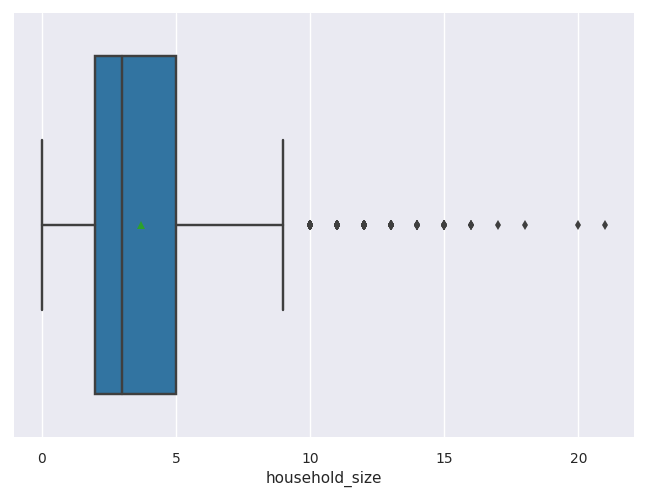

In [0]:

## FInding outliers using seaborn for numerical variables
sns.boxplot(proj['household_size'], showmeans = True)

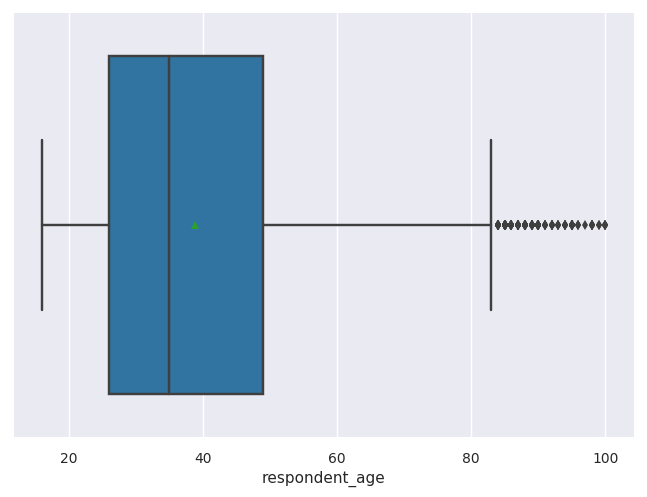

In [0]:
# FInding outliers using seaborn for numerical variables
##
sns.boxplot(proj['respondent_age'], showmeans = True)

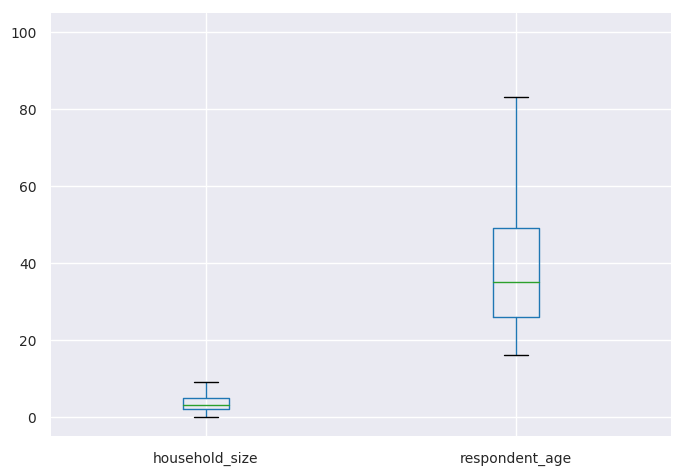

In [0]:
##
## Check for outliers
# boxplot = df.boxplot(grid=False, rot=45, fontsize=15)
boxplot = proj.boxplot(["household_size","respondent_age"])
plt.show()

Checking for Anomalies

In [0]:
# Anomalies detected in household_size size
proj[['household_size']].boxplot(figsize=(8,6))

Dropping values and columns

In [0]:
# Ensuring that you are dealing with years between 2016 and 2018
#
l = proj[proj['year']>2019].index

proj.drop(l,inplace=True)


In [0]:

##
#
proj.year.unique()

array([2018, 2016, 2017])

In [0]:
# dropping the uniqueid column due to the high cardinality in it's values
proj = proj.drop(columns = ['uniqueid'])

In [0]:

##
# Univariate analysis
proj.groupby('country').household_size.mean()

country
Kenya       3.987133
Rwanda      4.482782
Tanzania    1.931692
Uganda      4.983771
Name: household_size, dtype: float64

In [0]:
proj.groupby('country').household_size.median()

country
Kenya       4.0
Rwanda      4.0
Tanzania    2.0
Uganda      5.0
Name: household_size, dtype: float64

In [0]:

proj.groupby('country').household_size.std()

country
Kenya       2.334967
Rwanda      1.980386
Tanzania    1.055155
Uganda      2.893811
Name: household_size, dtype: float64

In [0]:
proj.groupby('country').household_size.count()

In [0]:
##
proj.groupby('level_of_education').household_size.count()

KeyError: ignored

Plotting Univariate and Bivariate

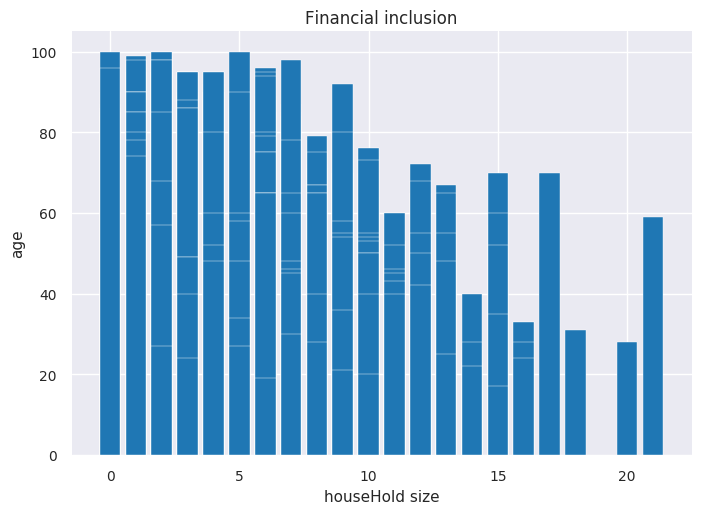

In [0]:

# Plot univariate and bivariate summaries recording your observations.
x = proj['household_size']
age = proj["respondent_age"]
plt.bar(x, age)
plt.ylabel("age")
plt.xlabel("houseHold size")
plt.title("Financial inclusion")
plt.show()

In [0]:
## check correlation
#
proj["respondent_age"].corr(proj["household_size"])

-0.11967115234154871

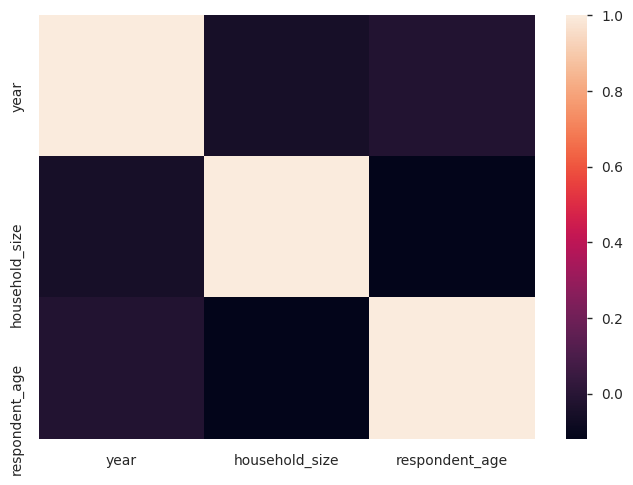

In [0]:
# Plot the correlation using a heatmap.
# The black colour represents that there is no linear relationship between the two variables. 
# A lighter shade shows that the relationship between the variables is more linear.
# ---
sns.heatmap(proj.corr())

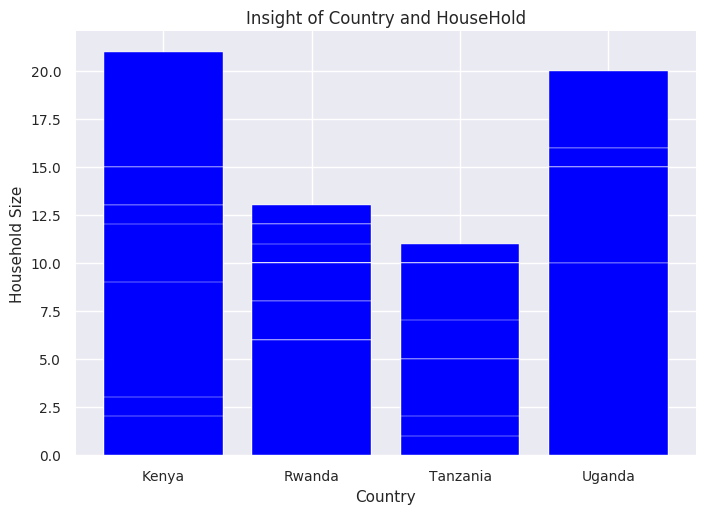

In [0]:
##
# seeing the relation of countries and the household_size
# Defining our data
country = proj['country']
house =  proj["household_size"]
plt.bar(country, house, color='blue')
# Labelling our x axis
plt.xlabel("Country")
# Labelling our y axis
plt.ylabel("Household Size")
# Giving a title to our Bar chart
plt.title("Insight of Country and HouseHold")
# Displaying our chart
plt.show()

In [0]:

##
## Pie chart for house hold and education level

hls = proj["household_size"].sample(7)
edl = proj["level_of_education"].unique().tolist()
explode = [0, 0, 0, 0.1, 0, 0, 0]

plt.pie(hls, explode=explode, labels=edl, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Pie chart of education level and house hold size')
plt.show()

KeyError: ignored

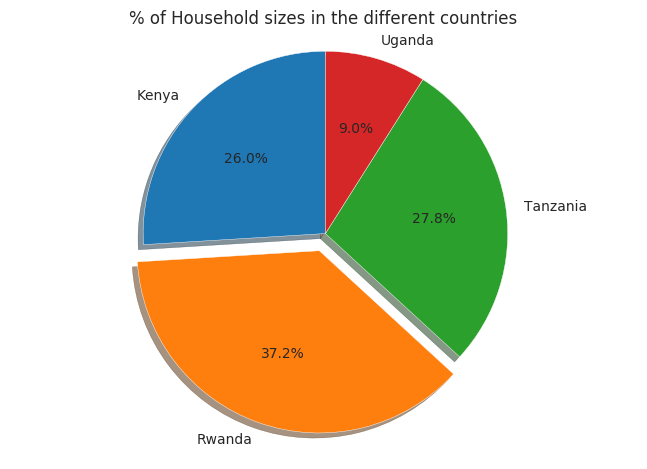

In [0]:

# Distribution of household sizes by count with country
country = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']
household = [6062, 8683, 6500, 2095]
explode = [0, 0.1, 0, 0]
# 
plt.pie(household, labels=country, explode=explode, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('% of Household sizes in the different countries')
plt.show()

In [0]:
# Ploting the univariate summaries and recording our observations
#
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(proj.household_size, proj.respondent_age, color='green')
plt.xticks(rotation=90)
ax.set_xlabel('Household size')
ax.set_ylabel('Respondent Age')
plt.title('% Performance in English Vs. State')
plt.show()

Making the Histogram

In [0]:

# Plotting a histogram of the respondent's ages
# proj['respondent_age'].hist()
#
sns.distplot(proj.respondent_age, kde = False)

In [0]:

# Plotting a histogram of the respondent's ages
# proj['respondent_age'].hist()
#
sns.distplot(proj.respondent_age, kde = True)

In [0]:
##
# PLotting histogram while dropping values
sns.distplot(proj.household_size.dropna());

In [0]:
# Plotting a histogram of the household size
#

sns.distplot(proj.household_size, kde = False)

In [0]:

##
## Scatter plot for household size and the respondent age
#
proj.plot(x='respondent_age', y='household_size', kind='scatter')

In [0]:
#This Has no correlation as the plots are scattered everywhere
project = proj.groupby(['gender_of_respondent'])['gender_of_respondent'].count()
project

In [0]:
project.plot(kind='bar', figsize=(8, 6))
plt.show()

In [0]:
#There were more female than male in the dataset
# Creating a pairplot to build histograms and scatter plots.
# ---
sns.pairplot(proj)

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

**Multivariate Analysis**

In [0]:

## Preprocessing
##
x = proj.drop('has_a_bank_account', 1)
y = proj['has_a_bank_account']

In [0]:
##
##
# Encoding the categorical columns
x = pd.get_dummies(x)
x.head()

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relathip_with_head_Child,the_relathip_with_head_Head of Household,the_relathip_with_head_Other non-relatives,the_relathip_with_head_Other relative,the_relathip_with_head_Parent,the_relathip_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_educuation_6,level_of_educuation_No formal education,level_of_educuation_Other/Dont know/RTA,level_of_educuation_Primary education,level_of_educuation_Secondary education,level_of_educuation_Tertiary education,level_of_educuation_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018,3.0,24.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,5.0,70.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,5.0,34.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,8.0,26.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:

##

# Splitting the dataset into the Training set and Test set

#
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [0]:

x_train.head()

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relathip_with_head_Child,the_relathip_with_head_Head of Household,the_relathip_with_head_Other non-relatives,the_relathip_with_head_Other relative,the_relathip_with_head_Parent,the_relathip_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_educuation_6,level_of_educuation_No formal education,level_of_educuation_Other/Dont know/RTA,level_of_educuation_Primary education,level_of_educuation_Secondary education,level_of_educuation_Tertiary education,level_of_educuation_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
21308,2017,1.0,45.0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
19670,2017,2.0,33.0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
22965,2018,7.0,36.0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
17830,2017,1.0,16.0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
22284,2018,8.0,31.0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [0]:

x_test.head()

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relathip_with_head_Child,the_relathip_with_head_Head of Household,the_relathip_with_head_Other non-relatives,the_relathip_with_head_Other relative,the_relathip_with_head_Parent,the_relathip_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_educuation_6,level_of_educuation_No formal education,level_of_educuation_Other/Dont know/RTA,level_of_educuation_Primary education,level_of_educuation_Secondary education,level_of_educuation_Tertiary education,level_of_educuation_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
2631,2018,1.0,33.0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
8380,2016,6.0,22.0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
9488,2016,5.0,19.0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
31,2018,5.0,38.0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1186,2018,1.0,48.0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [0]:
# Standardizing
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [0]:
x_test

array([[ 1.20207548, -1.17433718, -0.35120743, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [-1.15548487,  1.01082455, -1.01769419, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [-1.15548487,  0.5737922 , -1.19946331, ..., -0.22160018,
        -0.34761413, -0.61143302],
       ...,
       [-1.15548487, -0.30027249, -1.13887361, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [ 1.20207548,  1.44785689,  1.16353523, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [ 1.20207548, -1.17433718,  2.61768817, ..., -0.22160018,
        -0.34761413, -0.61143302]])

In [0]:

x_train

array([[ 0.0232953 , -1.17433718,  0.37586905, ..., -0.22160018,
        -0.34761413, -0.61143302],
       [ 0.0232953 , -0.73730484, -0.35120743, ..., -0.22160018,
        -0.34761413,  1.63550211],
       [ 1.20207548,  1.44785689, -0.16943831, ..., -0.22160018,
        -0.34761413,  1.63550211],
       ...,
       [-1.15548487, -0.73730484,  2.49650876, ...,  4.51263165,
        -0.34761413, -0.61143302],
       [-1.15548487,  1.44785689,  0.25468963, ...,  4.51263165,
        -0.34761413, -0.61143302],
       [ 1.20207548,  1.44785689, -0.47238684, ..., -0.22160018,
        -0.34761413, -0.61143302]])

In [0]:

##
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA(.95)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_train

array([[-0.22482777,  2.13920581,  0.66451616, ..., -0.1137306 ,
        -0.01519024,  0.57646328],
       [ 3.38531755, -2.69177387,  0.86333899, ..., -0.1587818 ,
        -0.06145493,  0.22448762],
       [-0.59223634,  1.81241658, -0.88860301, ...,  0.23855451,
         0.0321537 , -0.47805148],
       ...,
       [-1.02698951,  1.1357574 ,  3.72374391, ..., -0.6569727 ,
        -0.46770021,  2.56021084],
       [-2.63710863, -0.03927488, -0.73283394, ..., -0.1566391 ,
        -0.30123859,  0.45754463],
       [-1.51501427, -1.52134305, -1.85497273, ..., -0.47471793,
         0.11713997,  0.57057795]])

In [0]:
##
## Getting the explained variance ratio

ex_variance = pca.explained_variance_ratio_
ex_variance

array([0.10171163, 0.07253785, 0.06972458, 0.06247519, 0.05166259,
       0.04624466, 0.04015419, 0.03564433, 0.03487714, 0.03116651,
       0.02975091, 0.02710112, 0.02627195, 0.02523953, 0.02503204,
       0.02476803, 0.02467043, 0.024296  , 0.02415896, 0.02392125,
       0.02372821, 0.02327924, 0.02208826, 0.02111412, 0.01971555,
       0.01924303, 0.01542758, 0.01323842])

In [0]:

# The PCA Projection

from sklearn.decomposition import PCA

pca = PCA(n_components=23)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [0]:

# Training and Making Predictions.
# 
## Our ensemle method is Random Forest as it best with huge data
from sklearn.ensemble import RandomForestClassifier

clas = RandomForestClassifier(max_depth=2, random_state=0)
clas.fit(x_train, y_train)

y_pred = clas.predict(x_test)

In [0]:

# Performance Evaluation
#  This is by using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cons = confusion_matrix(y_test, y_pred)
print(cons)

In [0]:
y_test.shape

(4668,)

In [0]:
##
## This is performance evaluation using  accuracy score
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

NameError: ignored


This shows that the accuracy is 0.86889 which is the same as 86% that means the model is predicted around the mean

In [0]:
## Results with two principal components
##
pc = PCA(n_components=1)
x_train = pc.fit_transform(x_train)
x_test = pc.transform(x_test)
# 
clas1 = RandomForestClassifier(max_depth=2, random_state=0)
clas1.fit(x_train, y_train)

y_pred = clas1.predict(x_test)
# 
conf = confusion_matrix(y_test, y_pred)
print(conf)
print(accuracy_score(y_test, y_pred))

NameError: ignored

In [0]:
# Results with Full Feature Set 
# To do so, we simply remove the PCA part
# 
# OUR CODE GOES HERE
from sklearn.metrics import accuracy_score


print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

NameError: ignored

In [0]:
proj.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [0]:
##
##
proj['bank'] = proj['has_a_bank_account'].map( {'Yes':1, 'No':0} )
proj[['bank', 'has_a_bank_account']]

,bank,has_a_bank_account
0,1,Yes
1,0,No
2,1,Yes
3,0,No
4,0,No
5,0,No
6,0,No
7,0,No
8,1,Yes
9,0,No


In [0]:
##
##
x = proj[['year', 'household_size', 'respondent_age']]
y = proj['has_a_bank_account']

In [0]:
##
##
def convert(x):
  if x == 'Yes':
    x = 1
  else:
      x = 0
  return x

In [0]:
proj['has_a_bank_account'] = proj['has_a_bank_account'].apply(lambda x: convert(x))

In [0]:
y = y.apply(lambda x: convert(x))

In [0]:
y

0        1
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       1
12       0
13       0
14       0
15       0
16       0
17       1
18       0
19       0
20       0
21       1
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
23488    0
23489    0
23490    0
23491    0
23492    0
23493    0
23494    0
23495    0
23496    0
23497    0
23498    0
23499    0
23500    0
23501    0
23502    0
23503    0
23504    0
23505    0
23506    0
23507    0
23508    0
23509    0
23510    0
23511    0
23512    0
23519    0
23520    0
23521    0
23522    0
23523    0
Name: has_a_bank_account, Length: 23340, dtype: int64

In [0]:
proj.loc[:, proj['has_a_bank_account'] == 1]

In [0]:
y = y.astype(np.int)

In [0]:
##
##
lm = LinearRegression()
results = lm.fit(x_train,y_train)

In [0]:
## ## Predicting significant and non significant variables

X2 = sm.add_constant(x.values)  
model = sm.OLS(y, X2).fit()  
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     has_a_bank_account   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     105.4
Date:                Tue, 13 Aug 2019   Prob (F-statistic):           8.86e-68
Time:                        12:35:56   Log-Likelihood:                -8340.8
No. Observations:               23340   AIC:                         1.669e+04
Df Residuals:                   23336   BIC:                         1.672e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -92.6933      5.388    -17.203      0.0